In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
#load data
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data("/home/super-workstation/program/deep-learning/MNIST_data/mnist.npz")
x_train, x_test = x_train/255.0, x_test/255.0

/home/super-workstation/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/super-workstation/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/super-workstation/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/super-workstation/.local/lib/python3.6/site-packages

1.14.0


In [2]:
# setup shallow network 一个隐藏层
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Flatten(input_shape=(28,28))) # 展开
print(model.output_shape)
model.add(Dense(1024, activation='relu')) # 全连接(隐藏层1)
print(model.output_shape)
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 输出
print(model.output_shape)

sgd=SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=["accuracy"]) # 编译

# train model
print(x_train.shape)
model.fit(x_train, y_train, epochs=5)

Using TensorFlow backend.
W0808 11:25:46.719682 140453909714752 deprecation_wrapper.py:119] From /home/super-workstation/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 11:25:46.798406 140453909714752 deprecation_wrapper.py:119] From /home/super-workstation/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 11:25:46.855119 140453909714752 deprecation_wrapper.py:119] From /home/super-workstation/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 11:25:46.869084 140453909714752 deprecation_wrapper.py:119] From /home/super-workstation/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_wit

(None, 784)
(None, 1024)
(None, 10)
(60000, 28, 28)


W0808 11:25:47.115206 140453909714752 deprecation.py:323] From /home/super-workstation/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
60000/60000 [==============================] - 15s 251us/step - loss: 0.6508 - acc: 0.8262
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3533 - acc: 0.8993
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2964 - acc: 0.9163
Epoch 4/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2610 - acc: 0.9261
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.2337 - acc: 0.9345


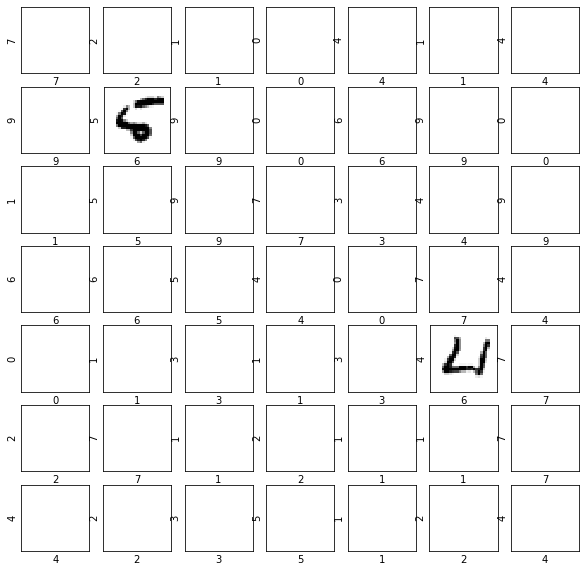

In [3]:
predicts = model.predict(x_test)

plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(x_test[i])#, cmap=plt.cm.binary)
    pred = predicts[i].tolist()
    pred_num = pred.index(max(pred))
    plt.xlabel(pred_num)
    plt.ylabel(y_test[i])
    if pred_num != y_test[i]:
        plt.imshow(x_test[i], cmap=plt.cm.binary)
plt.show()

In [4]:
# (!!!error)setup letnet-5 (7 layers)
# alias avg_pooling == ap
# conv1 + ap_1(5*5) + cov2 + ap_2(5*5) + full_1 + full_2 + output
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(6, (5,5), padding='same', input_shape=(28,28,1))) #1
print("conv2d_1--> ", model.output_shape)
model.add(AveragePooling2D(pool_size=(2,2)))#2
print("avg_pooling_1--> ", model.output_shape)
model.add(Conv2D(16, (5,5)))#3
print("conv2d_2--> ", model.output_shape)
model.add(Dropout(0.375))
model.add(AveragePooling2D(pool_size=(2,2)))#4
print("avg_pooling_2--> ", model.output_shape)
model.add(Flatten())
print("flatten --> ", model.output_shape)
model.add(Dense(120))#5
print("full_1 --> ", model.output_shape)
model.add(Dense(84))#6
print("full_2 --> ", model.output_shape)
model.add(Dense(10, activation='softmax'))
print('output --> ', model.output_shape)#7

# compile
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train
import datetime
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
# train
start_tm = datetime.datetime.now()
model.fit(x_train, y_train, epochs=5)
end_tm = datetime.datetime.now()
print("cost: ", (end_tm-start_tm).seconds)

# evaluate
scores = model.evaluate(x_test, y_test)

print("loss: ", scores[0])
print("ac: ", scores[1])

W0808 11:26:14.079864 140453909714752 deprecation_wrapper.py:119] From /home/super-workstation/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



conv2d_1-->  (None, 28, 28, 6)
avg_pooling_1-->  (None, 14, 14, 6)
conv2d_2-->  (None, 10, 10, 16)
avg_pooling_2-->  (None, 5, 5, 16)
flatten -->  (None, 400)
full_1 -->  (None, 120)
full_2 -->  (None, 84)
output -->  (None, 10)
Epoch 1/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.5444 - acc: 0.8355
Epoch 2/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.3837 - acc: 0.8866
Epoch 3/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.3672 - acc: 0.8915
Epoch 4/5
60000/60000 [==============================] - 9s 142us/step - loss: 0.3580 - acc: 0.8958
Epoch 5/5
60000/60000 [==============================] - 7s 125us/step - loss: 0.3527 - acc: 0.8970
cost:  41
10000/10000 [==============================] - 0s 29us/step
loss:  0.31097487979829314
ac:  0.9135


In [5]:
# (correction)setup letnet-5 (7 layers)
# alias avg_pooling == ap
# conv1 + ap_1(5*5) + cov2 + ap_2(5*5) + conv_3 + full_1 + output
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(6, (5,5), padding='same', input_shape=(28,28,1))) #1
print("conv2d_1--> ", model.output_shape)
model.add(AveragePooling2D(pool_size=(2,2)))#2
print("avg_pooling_1--> ", model.output_shape)
model.add(Conv2D(16, (5,5)))#3
print("conv2d_2--> ", model.output_shape)
model.add(Dropout(0.375))
model.add(AveragePooling2D(pool_size=(2,2)))#4
print("avg_pooling_2--> ", model.output_shape)
model.add(Conv2D(120, (5,5)))#5
print("conv2d_3 --> ", model.output_shape)
model.add(Flatten())
model.add(Dense(84))#6
print("full_1 --> ", model.output_shape)
model.add(Dense(10, activation='softmax'))#7
print('output --> ', model.output_shape)

# compile
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

conv2d_1-->  (None, 28, 28, 6)
avg_pooling_1-->  (None, 14, 14, 6)
conv2d_2-->  (None, 10, 10, 16)
avg_pooling_2-->  (None, 5, 5, 16)
conv2d_3 -->  (None, 1, 1, 120)
full_1 -->  (None, 84)
output -->  (None, 10)


In [6]:
import datetime
train_data = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
test_data = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
train_label = y_train
test_label = y_test

print(x_train.shape)
print(y_train.shape)
# train
start_tm = datetime.datetime.now()
model.fit(train_data, train_label, epochs=5)
end_tm = datetime.datetime.now()
print("cost: ", (end_tm-start_tm).seconds)

scores = model.evaluate(x_test, y_test)

print("loss: ", scores[0])
print("ac: ", scores[1])


(60000, 28, 28, 1)
(60000,)
Epoch 1/5
60000/60000 [==============================] - 11s 186us/step - loss: 0.6035 - acc: 0.8204
Epoch 2/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.3802 - acc: 0.8865
Epoch 3/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.3633 - acc: 0.8941
Epoch 4/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.3560 - acc: 0.8955
Epoch 5/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.3498 - acc: 0.8980
cost:  41
10000/10000 [==============================] - 0s 32us/step
loss:  0.3086549017041922
ac:  0.9128


In [17]:
# (correction)setup lenet-5 (7 layers) 原始版本
# alias avg_pooling == ap
# conv1 + ap_1(5*5) + cov2 + ap_2(5*5) + conv_3 + full_1 + output
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, Dropout, ZeroPadding2D
from keras.optimizers import SGD

from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1) # 高斯径向基函数
        res = K.exp(-1 * self.gamma * l2) # 
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

model = Sequential()
model.add(ZeroPadding2D(2, input_shape=(28,28,1)))
print("padding--> ", model.output_shape) 
#1 28×28×6
# 训练参数计算规则 （cx_size*cy_size*上一层维度（特征图个数）+1）*当前层维度
# 连接数 当前层和上一层的连接数  训练参数个数*特征图w*特征图h
# 训练参数 156 = （5×5+1）×6 
# 连接数 122304 = （5×5+1）×6×（28×28）
model.add(Conv2D(6, (5,5)))#1 
print("conv2d_1--> ", model.output_shape) 
#2 14×14×6 
#训练参数 12 6*(1+1) 当前层数（偏置+采样参数）
#连接数 5880 = （2×2 + 1）*6*(14*14)
model.add(AveragePooling2D(pool_size=(2,2)))#2
print("avg_pooling_1--> ", model.output_shape)
#3 10×10×16 
#训练参数 1516 = (3*5*5+ 1)*6 + (4*5*5+1)*6 + (4*5*5+1)*3 + (6*5*5+1)
#连接数 151600 = (3*5*5+ 1)*6×（10×10） + (4*5*5+1)*6×（10×10） + (4*5*5+1)*3*(10*10) + (6*5*5+1)*(10*10)
model.add(Conv2D(16, (5,5)))#3
print("conv2d_2--> ", model.output_shape)
#4 5*5*16
#训练参数 32 = 16*(1+1)
#连接个数 2000 = （2*2*1 + 1）*6*(5*5) 
model.add(AveragePooling2D(pool_size=(2,2)))#4
print("avg_pooling_2--> ", model.output_shape)
#5 1*1*120
#训练参数 48120 = (5*5*16 + 1)*120
#连接个数 48120 = (5*5*16 + 1)*120*(1*1)
model.add(Conv2D(120, (5,5)))#5
print("conv2d_3 --> ", model.output_shape)
model.add(Flatten())
#6 1*1*84
#训练参数 10164 = (1*1*120+1)*84
#连接个数 10164 = (1*1*120+1)*84*(1*1)
model.add(Dense(84, activation='tanh'))#6
print("full_1 --> ", model.output_shape)
#7 1*1*10
#训练参数 850 = （1*1*84+1)*10(1*1)
#连接个数 850 = （1*1*84+1)*10(1*1)
#model.add(Dense(10, activation='sigmoid'))#7
model.add(RBFLayer(10,0.5))
print('output --> ', model.output_shape)

# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import datetime
train_data = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
test_data = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
train_label = y_train
test_label = y_test

print(x_train.shape)
print(y_train.shape)
# train
start_tm = datetime.datetime.now()
model.fit(train_data, train_label, epochs=5)
end_tm = datetime.datetime.now()
print("cost: ", (end_tm-start_tm).seconds)

scores = model.evaluate(x_test, y_test)

print("loss: ", scores[0])
print("ac: ", scores[1])

padding-->  (None, 32, 32, 1)
conv2d_1-->  (None, 28, 28, 6)
avg_pooling_1-->  (None, 14, 14, 6)
conv2d_2-->  (None, 10, 10, 16)
avg_pooling_2-->  (None, 5, 5, 16)
conv2d_3 -->  (None, 1, 1, 120)
full_1 -->  (None, 84)
output -->  (None, 10)
(60000, 28, 28, 1)
(60000,)
Epoch 1/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.4155 - acc: 0.8899
Epoch 2/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.2450 - acc: 0.9287
Epoch 3/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.2024 - acc: 0.9419
Epoch 4/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.1785 - acc: 0.9487
Epoch 5/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.1615 - acc: 0.9541
cost:  38
10000/10000 [==============================] - 0s 42us/step
loss:  0.14773420667648315
ac:  0.9578
